In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/labeled_train.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0,47748,4,30,266,1224,1,25,5,2,...,0,0,0,0,0,0,0,0,1,0
1,1,212102,8,17,409,12182,2,0,13,7,...,0,0,0,0,0,0,0,0,1,0
2,2,60133,12,17,716,7056,2,5,12,6,...,0,0,0,0,0,0,0,0,1,0
3,3,34181,16,4,651,105,2,80,5,4,...,0,0,0,0,0,0,0,0,1,0
4,4,25045,17,3,1387,3909,5,40,5,10,...,0,0,0,0,0,0,0,0,1,0


In [4]:
labels = df["damage_grade"]
df.drop(["damage_grade"], axis=1, inplace=True)

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0,47748,4,30,266,1224,1,25,5,2,...,0,0,0,0,0,0,0,0,1,0
1,1,212102,8,17,409,12182,2,0,13,7,...,0,0,0,0,0,0,0,0,1,0
2,2,60133,12,17,716,7056,2,5,12,6,...,0,0,0,0,0,0,0,0,1,0
3,3,34181,16,4,651,105,2,80,5,4,...,0,0,0,0,0,0,0,0,1,0
4,4,25045,17,3,1387,3909,5,40,5,10,...,0,0,0,0,0,0,0,0,1,0


In [6]:
labels.head()

0    2
1    3
2    3
3    2
4    2
Name: damage_grade, dtype: int64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=.2)

In [11]:
df.head()
df.columns
new_df = df[["has_superstructure_mud_mortar_stone","has_superstructure_cement_mortar_brick"]]

In [12]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(new_df)
kmeans.cluster_centers_

array([[ 5.92403773e-02,  1.00000000e+00],
       [ 1.00000000e+00,  1.11868848e-13],
       [-3.35398376e-13,  2.72976086e-14]])

In [22]:
new_df['has_superstruc

0         1
1         1
2         1
3         1
4         0
5         0
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        0
17        0
18        1
19        1
20        1
21        1
22        1
23        0
24        1
25        1
26        1
27        0
28        0
29        1
         ..
260571    1
260572    1
260573    1
260574    1
260575    1
260576    1
260577    0
260578    0
260579    1
260580    1
260581    1
260582    0
260583    1
260584    1
260585    1
260586    1
260587    1
260588    1
260589    1
260590    1
260591    1
260592    0
260593    0
260594    1
260595    1
260596    1
260597    1
260598    1
260599    1
260600    1
Name: has_superstructure_mud_mortar_stone, Length: 260601, dtype: int64

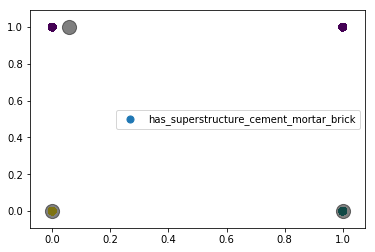

In [24]:
plt.scatter(new_df['has_superstructure_mud_mortar_stone'], new_df["has_superstructure_cement_mortar_brick"], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.legend()

In [10]:
y_pred.shape
df.shape
df['y'] = y_pred
(y_pred == labels).value_counts()

False    202206
True      58395
Name: damage_grade, dtype: int64

In [11]:
np.unique(y_pred)

array([0, 1, 2])

In [12]:
np.unique(labels)

array([1, 2, 3], dtype=int64)

In [15]:
y_adjusted = [i + 1 for i in y_pred]
np.unique(y_adjusted)

array([1, 2, 3])

In [26]:
(y_adjusted == labels).value_counts()

False    173664
True      86937
Name: damage_grade, dtype: int64

In [42]:
y_adjusted = [i + 1 if i!=3 else i**0 for i in y_adjusted]

In [47]:
type(labels)

pandas.core.series.Series

In [43]:
(y_adjusted == labels).value_counts()

False    173393
True      87208
Name: damage_grade, dtype: int64